# Machine Learning Basics - Prediction
- Probability and sampling to pick set of data
- Split into training and test set
- Build prediction function
- Predict for new data
- Evaluate

## In Sample vs Out of Sample Errors
- In Sample Error (resubstitution error): error from prediction on the dataset used to bulid the algorithm
- Out of Sample Error (generalization error): error from prediction on the new dataset
- Over-fitting: when is too optimized for the training set
  - In Sample Error < Out of Sample Error

## Example of over-fitting:
- Using "kernlab" package, included in "caret"
- Using dataset "spam":
  - A data frame with 4601 observations and 58 variables.
  - The first 48 variables contain the frequency of the variable name (e.g., business) in the e-mail. 
  - If the variable name starts with num (e.g., num650) the it indicates the frequency of the corresponding number (e.g., 650). 
  - The variables 49-54 indicate the frequency of the characters ";", "(", "[", "!", "\$", and "\#" 
  - The variables 55-57 contain the average, longest and total run-length of capital letters. 
  - Variable 58 indicates the type of the mail and is either "nonspam" or "spam", i.e. unsolicited commercial e-mail.



In [1]:
# Load data
library(dplyr)
library(tibble)
library(ggplot2)

library(kernlab)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha



In [2]:
data(spam)
dim(spam)

[1] 4601   58

In [3]:
head(spam)

make,address,all,num3d,our,over,remove,internet,order,mail,⋯,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,spam
0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,spam
0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,spam
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,spam
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,spam
0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,⋯,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,spam


In [4]:
# Set seed
set.seed(333)

In [5]:
# Pick a small random subset from the spam dataset
small_spam <- spam[sample(dim(spam)[1], size = 10), ]
dim(small_spam)

[1] 10 58

In [6]:
# Same as above using dplyr
small_spam <- spam %>%
  sample_n(10) %>%
  as_tibble()

In [7]:
# Tibble not displaying properly in Jupyter 
dim(small_spam)
head(small_spam)

[1] 10 58

make,address,all,num3d,our,over,remove,internet,order,mail,⋯,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.31,0.42,0,0.00,0.1,0,0.52,0.21,0.52,⋯,0,0.016,0.000,0.887,0.032,0.049,3.446,318,1003,spam
0,0.00,1.00,0,1.50,0.0,0,0.00,0.00,1.00,⋯,0,0.000,0.000,0.145,0.000,0.000,1.342,14,51,nonspam
0,0.00,0.00,0,0.00,0.0,0,0.00,0.00,0.00,⋯,0,0.143,0.000,0.143,0.000,0.000,1.370,4,37,nonspam
0,0.00,0.00,0,0.00,0.0,0,0.00,0.00,0.00,⋯,0,0.515,0.000,0.000,0.000,0.000,3.285,24,69,nonspam
0,0.00,0.00,0,0.74,0.0,0,0.00,0.00,1.49,⋯,0,0.557,0.111,0.000,0.000,0.000,2.607,12,133,nonspam
0,0.00,0.76,0,0.00,0.0,0,0.00,0.00,0.00,⋯,0,0.139,0.000,0.000,0.000,0.000,2.290,16,71,nonspam


### Label spam = 2 and ham = 1
- "type" is a factor variable. Can use it as a factor when using ggplot2

In [8]:
small_spam$type

[1] spam    nonspam nonspam nonspam nonspam nonspam nonspam nonspam spam   
[10] spam   
Levels: nonspam spam

In [9]:
# Evaluate the statement, TRUE = 1, FALSE = 0
spam_label <- (small_spam$type == "spam") * 1 + 1
spam_label

[1] 2 1 1 1 1 1 1 1 2 2

In [10]:
# Same as above using ifelse() function
spam_label <- ifelse(small_spam$type == "spam", 2, 1)
spam_label

[1] 2 1 1 1 1 1 1 1 2 2

### Plot the "capitalAve" Variable as either spam or ham based on "spam_label" as color

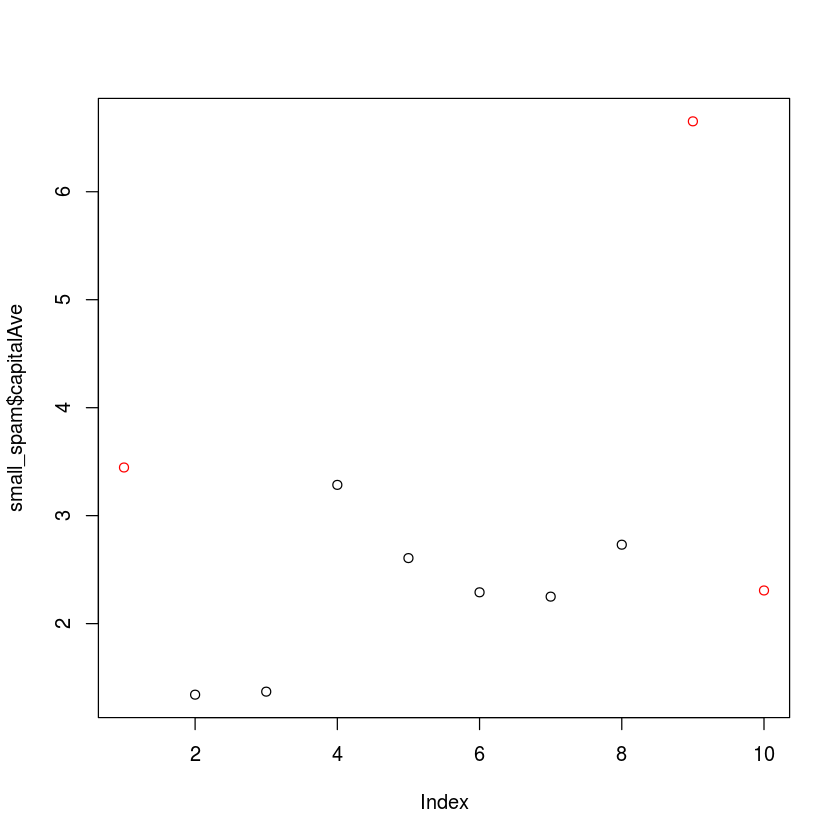

In [11]:
plot(small_spam$capitalAve, col = spam_label)

### Plot the "capitalAve" Variable as either spam or ham based on "type" as color using ggplot2

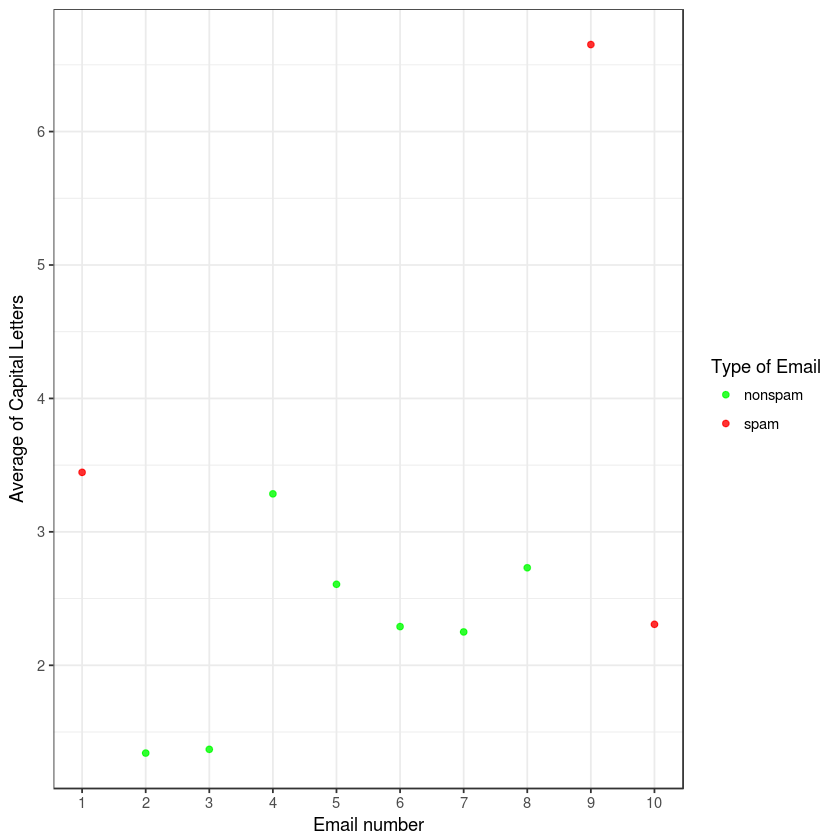

In [15]:
small_spam %>%
  ggplot() +
  theme_bw() +
  geom_point(aes(x = seq_along(capitalAve), y = capitalAve, color = type), alpha = 0.8) +
  scale_x_continuous(name = "Email number", breaks = 1:10, minor_breaks = FALSE) +
  scale_y_continuous(name = "Average of Capital Letters") +
  scale_color_manual(name = "Type of Email", values = c("green", "red"))